## G2M insight for Cab Investment firm

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt

### Loading Datasets from GitHub

In [87]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/Cab_Data.csv')
city_data = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/City.csv')
Customer_id = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/Customer_ID.csv')
Transaction_id = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/Transaction_ID.csv')

### cab_data (understanding each dataset)

In [88]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [89]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [90]:
from datetime import datetime, timedelta

def convert_date(date_number):
    converted_date = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + date_number - 2)
    formatted_date = converted_date.strftime('%Y-%m-%d')
    return formatted_date

In [91]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:convert_date(x))

In [92]:
cab_data.shape

(359392, 7)

In [93]:
cab_data.head(15)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [94]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [95]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


### city_data

In [96]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [97]:
city_data.shape

(20, 3)

In [98]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [99]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [100]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [101]:
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


 ### Customer_id

In [102]:
Customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [103]:
Customer_id.shape

(49171, 4)

In [104]:
Customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [105]:
Customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [106]:
Customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [107]:
Customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


### Transactions data

In [108]:
Transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [109]:
Transaction_id.shape

(440098, 3)

In [110]:
Transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [111]:
Transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [112]:
Transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [113]:
Transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


### Merging the data

In [114]:
#making the copy of each data to avoid any misplace of data.

cab_data_copy = cab_data
city_data_copy = city_data
Customer_id_copy = Customer_id
Transaction_id_copy = Transaction_id

In [115]:
#checking for duplicate values before merging:

display(cab_data[cab_data.duplicated()])
display(city_data[city_data.duplicated()])
display(Customer_id[Customer_id.duplicated()])
display(Transaction_id[Transaction_id.duplicated()])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


,City,Population,Users


,Customer ID,Gender,Age,Income (USD/Month)


,Transaction ID,Customer ID,Payment_Mode


#### Hence there is no duplicate and missing data in given datasets, we can proceed with merging

In [116]:
#merging the tables

Merged_data_set= cab_data.merge(Transaction_id, on='Transaction ID').merge(Customer_id, on='Customer ID').merge(city_data, on='City')

In [117]:
Merged_data_set

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


In [118]:
print(Merged_data_set.isnull().sum())

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


In [119]:
Merged_data_set['Profit'] = Merged_data_set['Price Charged'] - Merged_data_set['Cost of Trip']

In [120]:
# extract year, month and day into separate columns
Merged_data_set['Date of Travel'] = pd.to_datetime(Merged_data_set['Date of Travel'], format='%Y-%m-%d')
Merged_data_set ['year'] = Merged_data_set ['Date of Travel'].dt.year
Merged_data_set ['month'] = Merged_data_set ['Date of Travel'].dt.month
Merged_data_set ['day'] = Merged_data_set ['Date of Travel'].dt.day

In [121]:
Merged_data_set

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,2016,1,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,2016,1,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",27.5680,2016,1,2
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701",25.7980,2016,1,7
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701",16.8440,2016,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001",5.8800,2018,1,8
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001",6.9020,2018,1,4
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001",87.4200,2018,1,5
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001",32.1420,2018,1,5


In [122]:
Merged_data_set.shape

(359392, 18)

In [123]:
#understanding and correcting the datatype:
Col_to_convert = ["Company","City","Payment_Mode","Gender"]
for col in Col_to_convert :
    Merged_data_set[col] = Merged_data_set [col].astype('category')

In [124]:
Col_to_convert = ["Population","Users"]
for col in Col_to_convert :
    Merged_data_set[col] = Merged_data_set [col].str.replace(',', '').astype('int64')

In [125]:
Merged_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [126]:
pink_cab_data= Merged_data_set [Merged_data_set ['Company'] == 'Pink Cab']
yellow_cab_data= Merged_data_set [Merged_data_set ['Company'] == 'Yellow Cab']

In [127]:
pink_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,2016,1,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,2016,1,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,2016,1,2
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,2016,1,7
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,2016,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357449,10437610,2018-01-06,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,51142,Card,Female,40,3122,418859,127001,48.590,2018,1,6
357450,10437611,2018-12-31,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,52754,Card,Female,29,19676,418859,127001,85.344,2018,12,31
357451,10437612,2018-01-07,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,53039,Card,Male,37,22765,418859,127001,58.390,2018,1,7
357452,10437614,2018-01-02,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,51766,Cash,Male,18,12364,418859,127001,31.560,2018,1,2


In [128]:
pink_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84711 entries, 0 to 357453
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      84711 non-null  int64         
 1   Date of Travel      84711 non-null  datetime64[ns]
 2   Company             84711 non-null  category      
 3   City                84711 non-null  category      
 4   KM Travelled        84711 non-null  float64       
 5   Price Charged       84711 non-null  float64       
 6   Cost of Trip        84711 non-null  float64       
 7   Customer ID         84711 non-null  int64         
 8   Payment_Mode        84711 non-null  category      
 9   Gender              84711 non-null  category      
 10  Age                 84711 non-null  int64         
 11  Income (USD/Month)  84711 non-null  int64         
 12  Population          84711 non-null  int64         
 13  Users               84711 non-null  int64         

In [129]:
pink_cab_data.shape

(84711, 18)

In [130]:
yellow_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,814885,24701,877.0076,2016,1,2
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,28,3901,814885,24701,895.7768,2016,1,9
235,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Cash,Male,32,13505,814885,24701,232.3320,2016,1,3
236,10000387,2016-01-06,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Cash,Male,39,28386,814885,24701,504.1600,2016,1,6
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Card,Male,35,17761,814885,24701,944.1908,2016,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001,5.8800,2018,1,8
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001,6.9020,2018,1,4
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001,87.4200,2018,1,5
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001,32.1420,2018,1,5


In [131]:
yellow_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274681 entries, 233 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      274681 non-null  int64         
 1   Date of Travel      274681 non-null  datetime64[ns]
 2   Company             274681 non-null  category      
 3   City                274681 non-null  category      
 4   KM Travelled        274681 non-null  float64       
 5   Price Charged       274681 non-null  float64       
 6   Cost of Trip        274681 non-null  float64       
 7   Customer ID         274681 non-null  int64         
 8   Payment_Mode        274681 non-null  category      
 9   Gender              274681 non-null  category      
 10  Age                 274681 non-null  int64         
 11  Income (USD/Month)  274681 non-null  int64         
 12  Population          274681 non-null  int64         
 13  Users               274681 non-n

### EDA Aanalysis:

In [132]:
#Average fare of each cab:

average_fare_by_company = Merged_data_set.groupby("Company")["Price Charged"].mean()

print (average_fare_by_company)

Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64


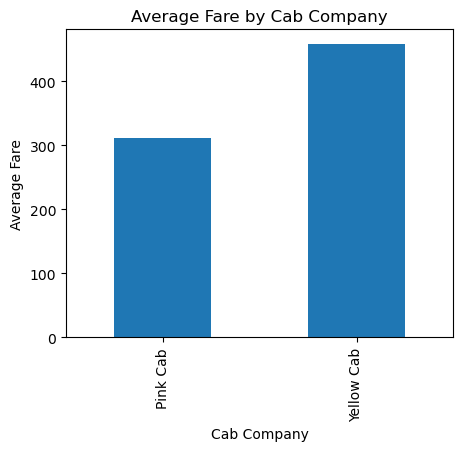

In [133]:
# Plotting the average fare for each cab company as a bar plot

average_fare_by_company.plot(kind="bar", figsize=(5,4))

# Add labels and title to the plot
plt.xlabel("Cab Company")
plt.ylabel("Average Fare")
plt.title("Average Fare by Cab Company")

plt.show()

* The above plot shows the average fare charged by each cab company, with Yellow cab company having a higher average fare than Pink cab Company.

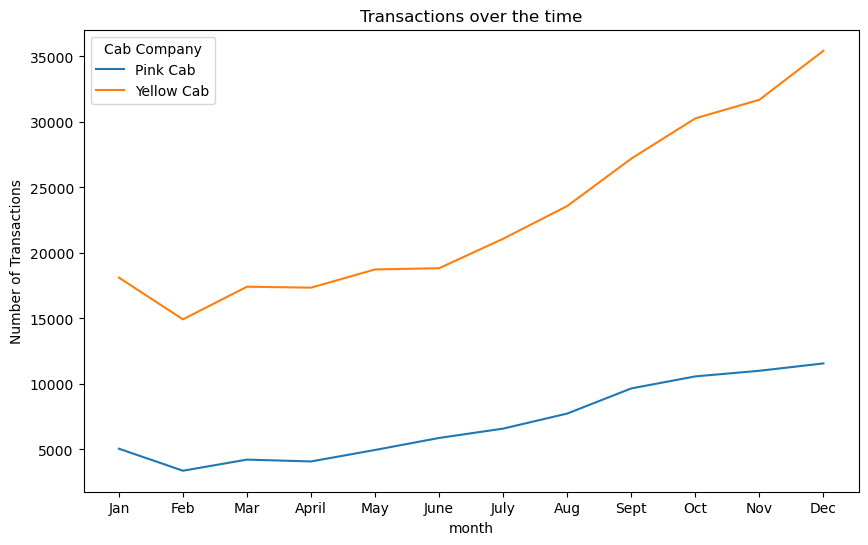

In [134]:
#Transaction data over the Months:

# Grouping the data
monthly_transactions = Merged_data_set.groupby(['month', 'Company'])['Transaction ID'].count().reset_index()

# Pivot the data
monthly_transactions_pivot = monthly_transactions.pivot(index='month', columns='Company', values='Transaction ID')

# Plot the trends in a line graph
monthly_transactions_pivot.plot(kind='line', figsize=(10, 6))


plt.title('Transactions over the time')
plt.xlabel('month')
plt.ylabel('Number of Transactions')

plt.xticks(ticks=range(1,13),labels=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Cab Company')
plt.show()

* after analyzing the trends, yellow cab company has better monthly transactions than pink cab company

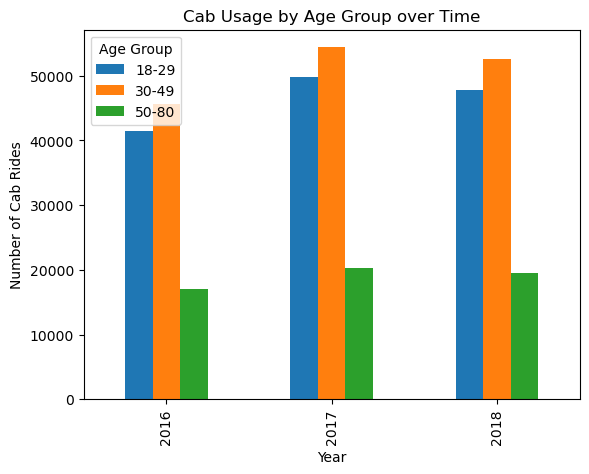

In [135]:
#Cab usage by different age groups


# define the bin edges and labels for the age groups.
bins = [18, 30, 50, 80]
labels = ['18-29', '30-49', '50-80'] 
Merged_data_set['Age Group'] = pd.cut(Merged_data_set['Age'], bins=bins, labels=labels)


# Grouping the data
age_group_data = Merged_data_set.groupby(["Age Group", "year"]).size().reset_index(name="Count")

# Pivot the data
age_group_data_pivot = age_group_data.pivot(index="year", columns="Age Group", values="Count")

# Create a chart
ax = age_group_data_pivot.plot(kind='bar', stacked=False)
ax.set_title('Cab Usage by Age Group over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cab Rides')

plt.show()

* Throughout the 3 years of span i.e 2016-2018, the Age group of 30-49 has used maximum cabs more than other age groups.

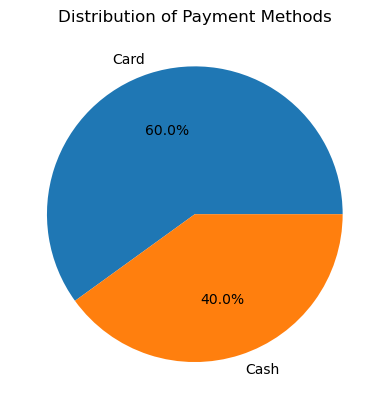

In [136]:
#Payment methods used for cab rides:


# Group the data
payment_mode_data = Merged_data_set.groupby('Payment_Mode')['Transaction ID'].count()

# Create a pie chart
plt.pie(payment_mode_data, labels=payment_mode_data.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.show()

* Maximum cab users are preferring to pay the cab fair through cards.

In [137]:
#total revenue earned by each cab company

total_revenue = cab_data.groupby('Company')['Price Charged'].sum()
total_revenue

Company
Pink Cab      2.632825e+07
Yellow Cab    1.258539e+08
Name: Price Charged, dtype: float64

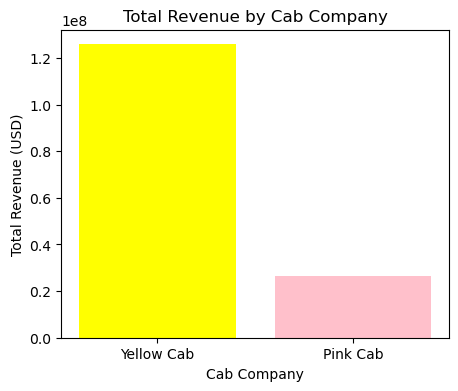

In [138]:
revenue_by_company = total_revenue.sort_values(ascending=False)
colors = ['yellow', 'pink']

# Plotting a bar chart
plt.figure(figsize=(5,4))
plt.bar(revenue_by_company.index, revenue_by_company.values, color=colors)
plt.xlabel('Cab Company')
plt.ylabel('Total Revenue (USD)')
plt.title('Total Revenue by Cab Company')
plt.show()

* Yellow cab company has highest overall Revenue than the pink cab company.

In [139]:
#Total no.of cab users based on gender

#pink cab gender count
pink_cab_gender = pink_cab_data.groupby('Gender')['Gender'].count()
print(pink_cab_gender)

#yellow cab gender count
yellow_cab_gender = yellow_cab_data.groupby('Gender')['Gender'].count()
print(yellow_cab_gender)

Gender
Female    37480
Male      47231
Name: Gender, dtype: int64
Gender
Female    116000
Male      158681
Name: Gender, dtype: int64


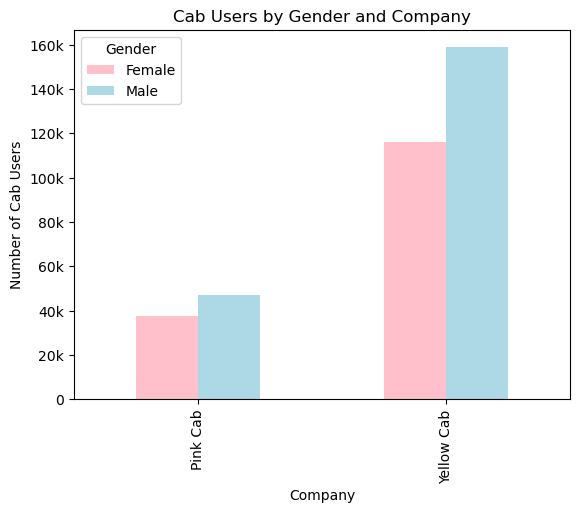

In [140]:
# Creating a pivot table to count the no.of cab users by gender and company
gender_pivot = Merged_data_set.pivot_table(index='Company', columns='Gender', values='Customer ID', aggfunc='count')

# Define the color map
colors = ['Pink', 'lightblue']

# Create the bar chart
ax = gender_pivot.plot(kind='bar', stacked=False, color=colors)
plt.title('Cab Users by Gender and Company')
plt.xlabel('Company')
plt.ylabel('Number of Cab Users')
ax.set_yticklabels(['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k'])
plt.show()

* The above chart, shows that males use cabs more frequently than females and In Yellow Cabs, Males users are approximately 15% more than the Females users. 

In [141]:
#Total Transactions by year between companies:

pink_cab_trans = pink_cab_data.groupby(['year'])['Transaction ID'].count()
print(pink_cab_trans)

yellow_cab_trans = yellow_cab_data.groupby(['year'])['Transaction ID'].count()
print(yellow_cab_trans)

year
2016    25080
2017    30321
2018    29310
Name: Transaction ID, dtype: int64
year
2016    82239
2017    98189
2018    94253
Name: Transaction ID, dtype: int64


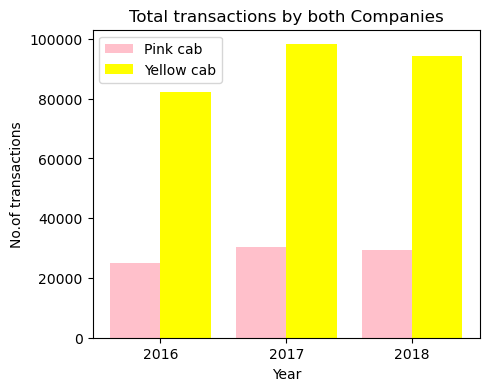

In [142]:
#plotting the graph:

fig,axes = plt.subplots(figsize=(5,4))
axes.bar(pink_cab_trans.index-0.2, pink_cab_trans.values, width=0.4,color="Pink")
axes.bar(yellow_cab_trans.index+0.2, yellow_cab_trans.values, width=0.4,color="Yellow")

plt.xlabel('Year')
plt.ylabel('No.of transactions')
plt.title("Total transactions by both Companies")
plt.xticks(np.arange(min(pink_cab_trans.index), max(yellow_cab_trans.index)+1,1.0))
plt.legend(['Pink cab','Yellow cab'])
plt.show()

- From the above graph, the Yellow cab has Highest no.of transactions in 2017 & 2018.

In [143]:
#Average Profit by both Companies:
average_profit=Merged_data_set.groupby(['Company']).Profit.mean()
average_profit

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

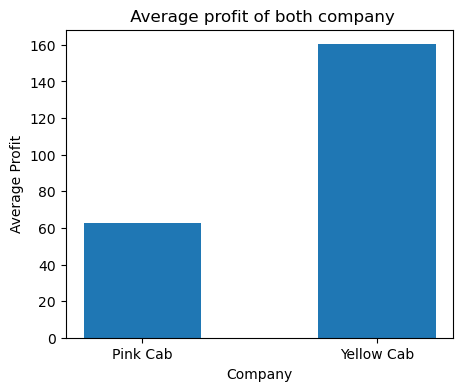

In [144]:
#plotting the graph:

fig,axes = plt.subplots(figsize=(5,4))
axes.bar(average_profit.index, average_profit.values, width=0.5)
plt.ylabel("Average Profit")
plt.xlabel("Company")
plt.title(" Average profit of both company")
plt.show()

The average profit of yellow cab company is nearly 2.5x higher than Pink cab

In [145]:
#Average profit by both companies over the year:

#Pink Cab Company profit
avg_profit_pink_cab = Merged_data_set[Merged_data_set.Company=="Pink Cab"].groupby('year').Profit.mean()
avg_profit_pink_cab

year
2016    68.321819
2017    67.070839
2018    53.229689
Name: Profit, dtype: float64

In [146]:
#Yellow Cab company Profit

avg_profit_yellow_cab = Merged_data_set[Merged_data_set.Company=="Yellow Cab"].groupby('year').Profit.mean()
avg_profit_yellow_cab

year
2016    169.347821
2017    168.817057
2018    143.416122
Name: Profit, dtype: float64

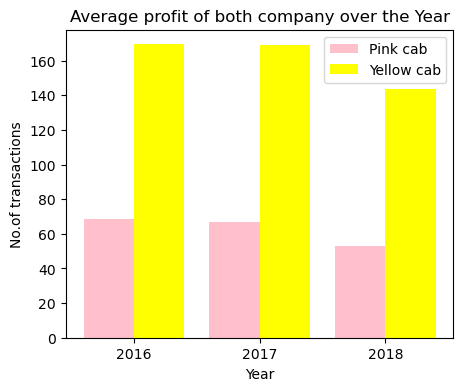

In [147]:
#plotting the graph:

fig,axes = plt.subplots(figsize=(5,4))
axes.bar(avg_profit_pink_cab.index-0.2, avg_profit_pink_cab.values, width=0.4,color="Pink")
axes.bar(avg_profit_yellow_cab.index+0.2, avg_profit_yellow_cab.values, width=0.4,color="Yellow")

plt.xlabel('Year')
plt.ylabel('No.of transactions')
plt.title("Average profit of both company over the Year")
plt.xticks(np.arange(min(avg_profit_pink_cab.index), max(avg_profit_yellow_cab.index)+1,1.0))
plt.legend(['Pink cab','Yellow cab'])
plt.show()

From the Chart, its evident that the average profit of the both companies has seen declining. But throughout all years, the Average profit of Yellow cab is 2.5x times more than pink cab.